In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

data_dir = "./data/digits_epochs/"
file = data_dir + "freq_bands/all_data_all_epochs.pkl"
all_epochs = pickle.load(open(file, "rb")).pick(picks="meg", exclude="bads")

if os.path.exists(data_dir + "all_epochs_tfr_beta.pkl"):
    with open(data_dir + "all_epochs_tfr_beta.pkl", "rb") as f:
        power = pickle.load(f)

In [12]:
from mne.baseline import rescale

power_scaled = []
integrated_power_low = []
integrated_power_high = []

for i in range(5):
    data = power[i + 1].data
    times = power[i + 1].times
    baseline = (-2, -0.57)
    data = rescale(data, times, baseline, mode="logratio", verbose=False)
    if np.iscomplexobj(data):
        data = (data * data.conj()).real
    time_indices = np.where((times >= -1.75) & (times <= 1.75))[0]
    times = times[time_indices]
    power_scaled.append(data[:, :, time_indices])

    time_low = np.where((times >= -0.5) & (times <= 0.5))[0]
    time_high = np.where((times >= 0.75) & (times <= 1.75))[0]
    freqs_interest = np.where((power[1].freqs >= 12.5) & (power[1].freqs <= 30))[0]

    integrated_power_low.append(
        power_scaled[i][:, :, time_low][:, freqs_interest, :].mean(axis=1).mean(axis=1)
    )

    integrated_power_high.append(
        power_scaled[i][:, :, time_high][:, freqs_interest, :].mean(axis=1).mean(axis=1)
    )

integrated_power_low = np.array(integrated_power_low)
integrated_power_high = np.array(integrated_power_high)

all_power = np.concatenate((integrated_power_low, integrated_power_high), axis=0)

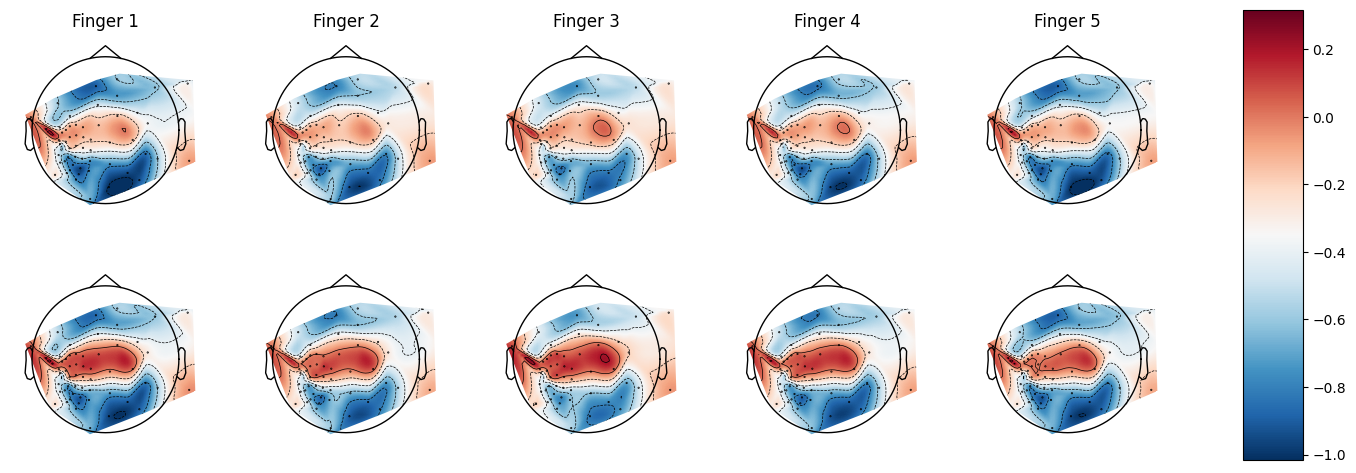

In [9]:
from opm_thesis.preprocessing.utils import get_closest_sensors

closest_sensors = get_closest_sensors(all_epochs.info, "LQ[X]", num_channels=100)
idx_closest_sensors = [all_epochs.ch_names.index(sensor) for sensor in closest_sensors]

x_sensors = [
    all_epochs.ch_names.index(sensor)
    for sensor in closest_sensors
    if "X" in sensor[-2]
]
y_sensors = [
    all_epochs.ch_names.index(sensor) for sensor in closest_sensors if "Y" in sensor[-2]
]
z_sensors = [
    all_epochs.ch_names.index(sensor) for sensor in closest_sensors if "Z" in sensor[-2]
]

fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):

    mne.viz.plot_topomap(
        integrated_power_low[i, x_sensors],
        all_epochs.copy().pick(x_sensors).info,
        show=False,
        axes=axes[0, i],
        sphere=0.12,
        vlim=(
            integrated_power_low.min(),
            integrated_power_high.max(),
        ),
    )
    axes[0, i].set_title(f"Finger {i+1}")
    im, _ = mne.viz.plot_topomap(
        integrated_power_high[i, x_sensors],
        all_epochs.copy().pick(x_sensors).info,
        show=False,
        sphere=0.12,
        axes=axes[1, i],
        vlim=(
            integrated_power_low.min(),
            integrated_power_high.max(),
        ),
    )
ax_x_start = 0.95
ax_x_width = 0.04
ax_y_start = 0.1
ax_y_height = 0.9
cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
clb = fig.colorbar(im, cax=cbar_ax)
plt.show()

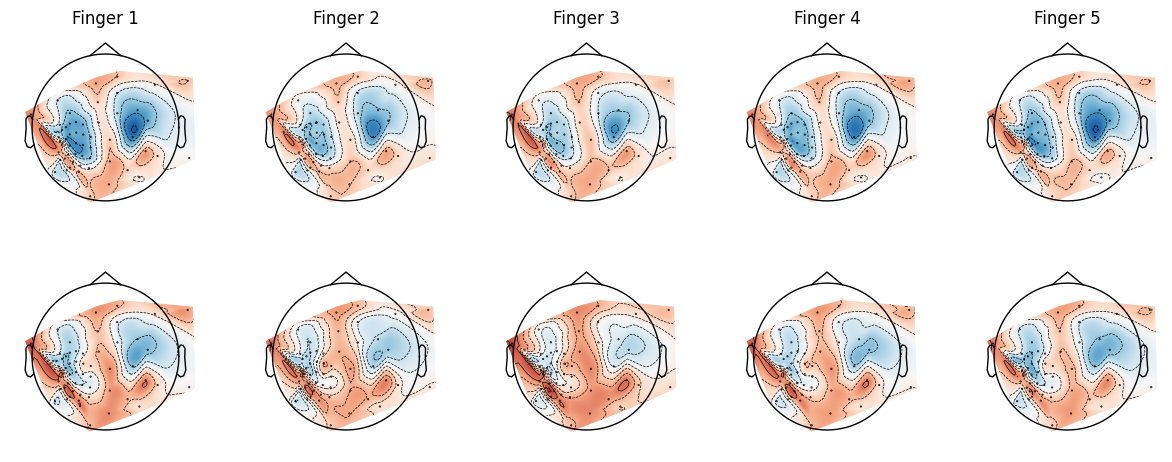

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):

    mne.viz.plot_topomap(
        integrated_power_low[i, y_sensors],
        all_epochs.copy().pick(y_sensors).info,
        show=False,
        sphere=0.12,
        axes=axes[0, i],
        vlim=(
            integrated_power_low.min(),
            integrated_power_high.max(),
        ),
    )
    axes[0, i].set_title(f"Finger {i+1}")
    mne.viz.plot_topomap(
        integrated_power_high[i, y_sensors],
        all_epochs.copy().pick(y_sensors).info,
        show=False,
        sphere=0.12,
        axes=axes[1, i],
        vlim=(
            integrated_power_low.min(),
            integrated_power_high.max(),
        ),
    )
plt.show()

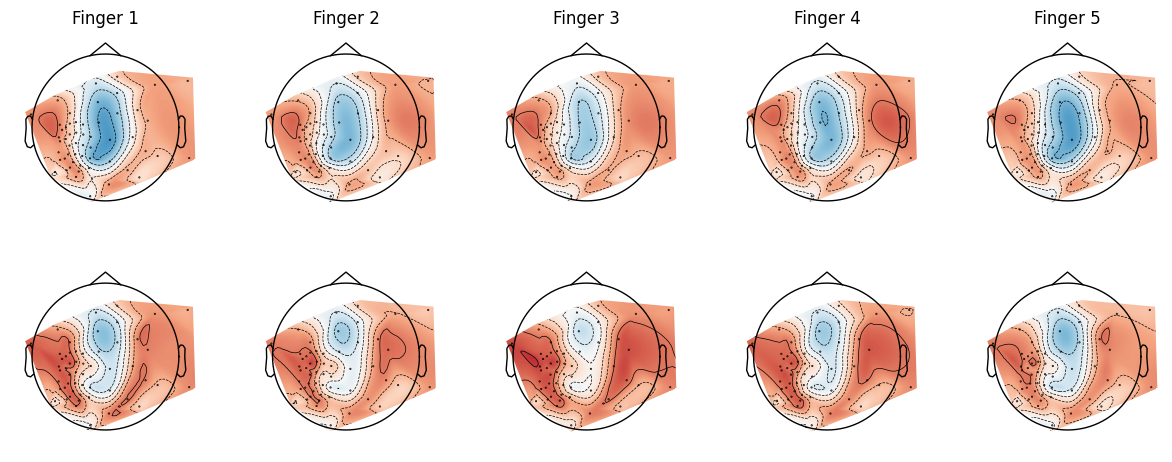

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
for i in range(5):

    mne.viz.plot_topomap(
        integrated_power_low[i, z_sensors],
        all_epochs.copy().pick(z_sensors).info,
        show=False,
        axes=axes[0, i],
        sphere=0.12,
        vlim=(
            integrated_power_low.min(),
            integrated_power_high.max(),
        ),
    )
    axes[0, i].set_title(f"Finger {i+1}")
    mne.viz.plot_topomap(
        integrated_power_high[i, z_sensors],
        all_epochs.copy().pick(z_sensors).info,
        show=False,
        sphere=0.12,
        axes=axes[1, i],
        vlim=(
            integrated_power_low.min(),
            integrated_power_high.max(),
        ),
    )
plt.show()